In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
test = pd.read_csv('/Users/olgakadocnikova/Downloads/home-credit-default-risk/application_test.csv', index_col='SK_ID_CURR') 

In [34]:
train = pd.read_csv('/Users/olgakadocnikova/Downloads/home-credit-default-risk/application_train.csv', index_col='SK_ID_CURR') 

In [35]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
TARGETS = ['TARGET']

In [18]:
for c in train.columns:
    uniq = np.unique([str(x) for x in train[c].values])
    print(c, len(uniq), uniq[:5])

SK_ID_CURR 307511 ['100002' '100003' '100004' '100006' '100007']
TARGET 2 ['0' '1']
NAME_CONTRACT_TYPE 2 ['Cash loans' 'Revolving loans']
CODE_GENDER 3 ['F' 'M' 'XNA']
FLAG_OWN_CAR 2 ['N' 'Y']
FLAG_OWN_REALTY 2 ['N' 'Y']
CNT_CHILDREN 15 ['0' '1' '10' '11' '12']
AMT_INCOME_TOTAL 2548 ['100071.0' '100089.0' '100125.0' '1001826.0' '100278.0']
AMT_CREDIT 5603 ['1000417.5' '1000858.5' '1001133.0' '1001425.5' '1001713.5']
AMT_ANNUITY 13673 ['100017.0' '10003.5' '100057.5' '100071.0' '10008.0']
AMT_GOODS_PRICE 1003 ['1003500.0' '1008000.0' '1012500.0' '1015519.5' '1017000.0']
NAME_TYPE_SUITE 8 ['Children' 'Family' 'Group of people' 'Other_A' 'Other_B']
NAME_INCOME_TYPE 8 ['Businessman' 'Commercial associate' 'Maternity leave' 'Pensioner'
 'State servant']
NAME_EDUCATION_TYPE 5 ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS 6 ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Unknown']
NAME_HOUSING_T

In [8]:
def is_float(x):
    try:
        y = float(x)
        return True
    except:
        return False

def is_categ_col(df, col_name, uniq_bound=9):
    val = df[col_name].values
    val = [np.nan_to_num(x) for x in val]
    has_any_str = np.max([not is_float(x) for x in val])
    if has_any_str:
        return True
    if len(np.unique(val)) < uniq_bound:
        return True
    return False

In [45]:
# col_types = {}

# for c in train.columns:
#     col_types[c] = is_categ_col(train, c)
#     print(c, col_types[c])

SK_ID_CURR False
TARGET True
NAME_CONTRACT_TYPE True
CODE_GENDER True
FLAG_OWN_CAR True
FLAG_OWN_REALTY True
CNT_CHILDREN False
AMT_INCOME_TOTAL False
AMT_CREDIT False
AMT_ANNUITY False
AMT_GOODS_PRICE False
NAME_TYPE_SUITE True
NAME_INCOME_TYPE True
NAME_EDUCATION_TYPE True
NAME_FAMILY_STATUS True
NAME_HOUSING_TYPE True
REGION_POPULATION_RELATIVE False
DAYS_BIRTH False
DAYS_EMPLOYED False
DAYS_REGISTRATION False
DAYS_ID_PUBLISH False
OWN_CAR_AGE False
FLAG_MOBIL True
FLAG_EMP_PHONE True
FLAG_WORK_PHONE True
FLAG_CONT_MOBILE True
FLAG_PHONE True
FLAG_EMAIL True
OCCUPATION_TYPE True
CNT_FAM_MEMBERS False
REGION_RATING_CLIENT True
REGION_RATING_CLIENT_W_CITY True
WEEKDAY_APPR_PROCESS_START True
HOUR_APPR_PROCESS_START False
REG_REGION_NOT_LIVE_REGION True
REG_REGION_NOT_WORK_REGION True
LIVE_REGION_NOT_WORK_REGION True
REG_CITY_NOT_LIVE_CITY True
REG_CITY_NOT_WORK_CITY True
LIVE_CITY_NOT_WORK_CITY True
ORGANIZATION_TYPE True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTM

In [46]:
# np.save('col_types.npy', col_types)

In [9]:
col_types = np.load('col_types.npy', allow_pickle=True).item()

In [10]:
def print_graph(df, c):
    plt.plot(df[c].values)
    plt.title(c)
    plt.show()

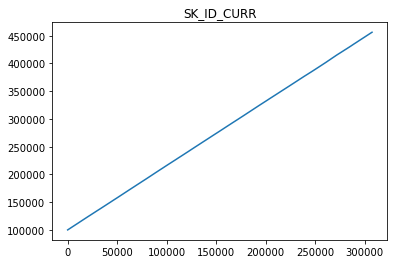

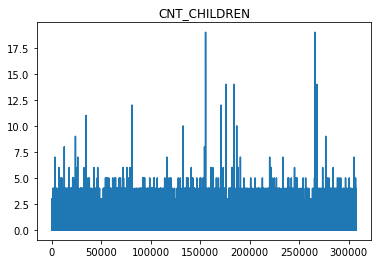

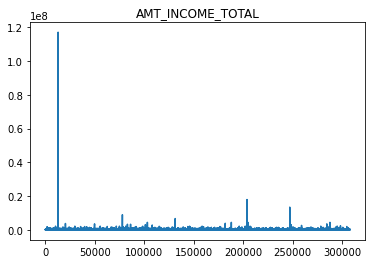

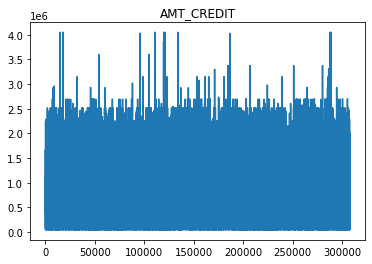

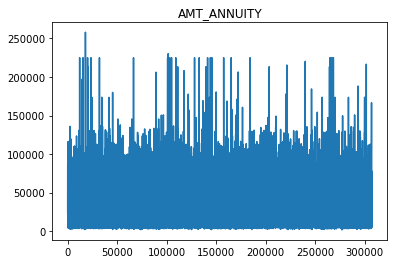

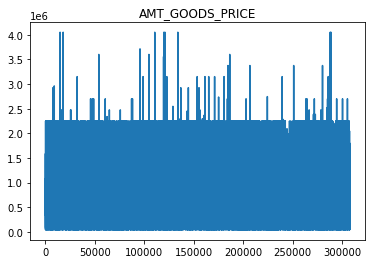

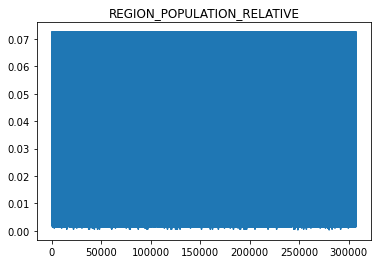

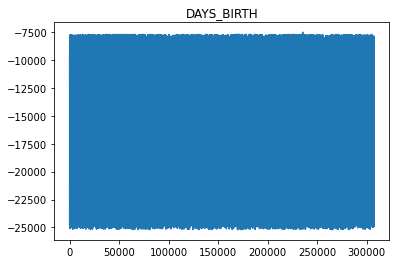

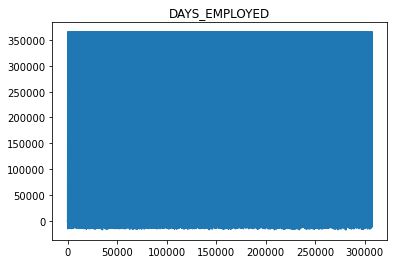

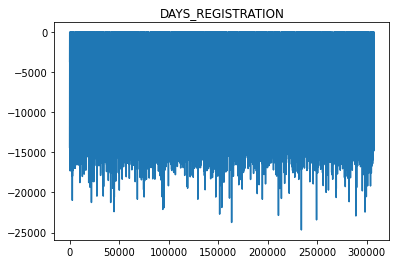

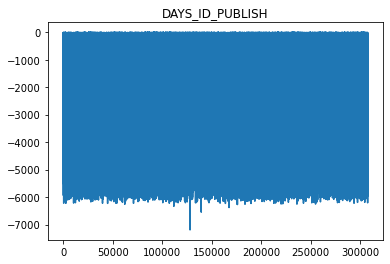

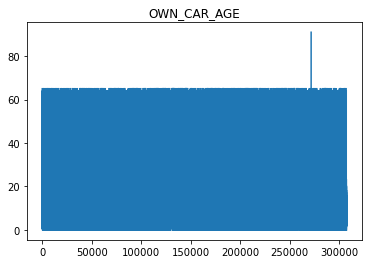

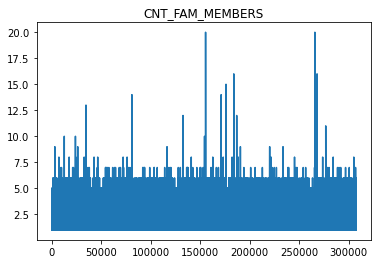

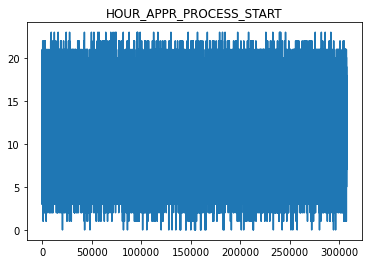

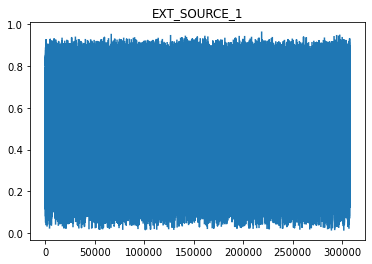

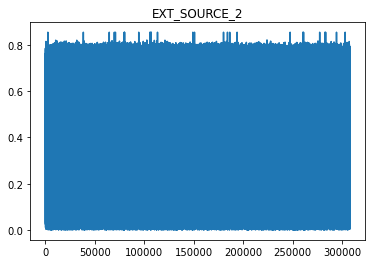

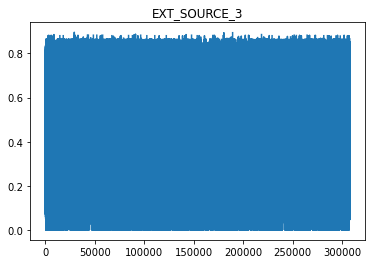

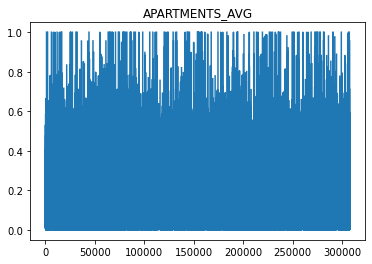

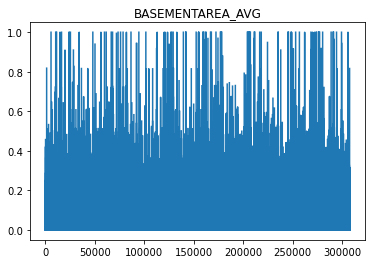

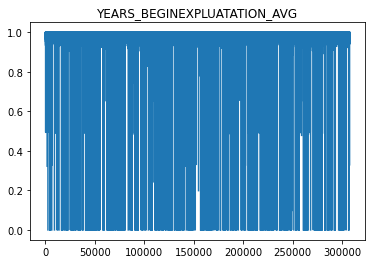

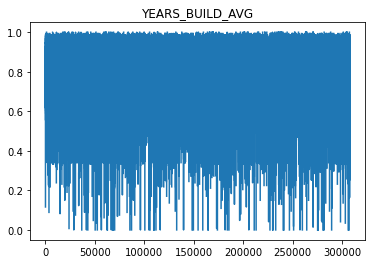

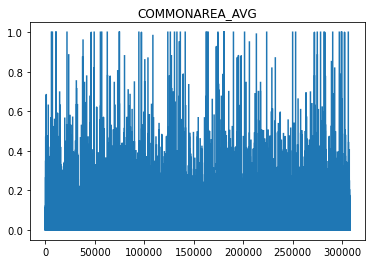

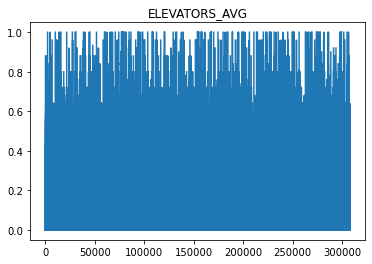

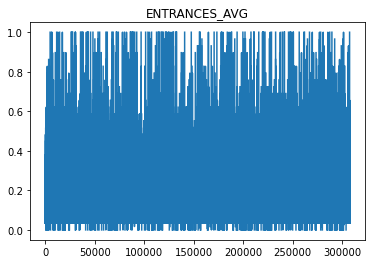

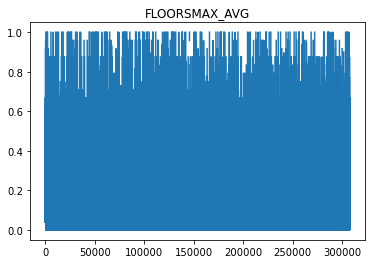

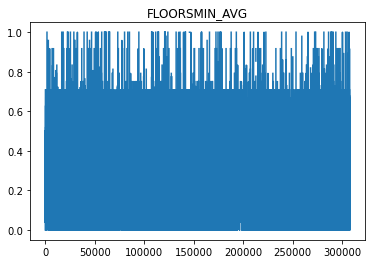

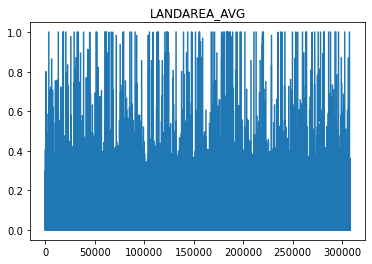

KeyboardInterrupt: 

In [49]:
for c in col_types.keys():
    if not col_types[c]:
        print_graph(train ,c)

In [46]:
def shrink_outliers_impl(df, c, threshold=2, stats=None):
    copy_df = deepcopy(df)
    v = df[c].values
    if stats is None:
        mean = np.nanmedian(v)
        std = np.nanstd(v)
    else:
        mean, std = stats
    copy_df[c] = np.clip(v, a_min=mean - threshold * std, a_max=mean + threshold * std)
    return copy_df, (mean, std)

In [47]:
def shrink_outliers(df, stats={}):
    df_ext = df
    for c in col_types.keys():
        if not col_types[c] and c not in TARGETS:
            df_ext, stat = shrink_outliers_impl(df=df_ext, c=c, stats=stats.get(c, None))
            if c not in stats:
                stats[c] = stat
    return df_ext, stats

In [48]:
def fill_nan_impl(df, c, f, default=None):
    v = df[c].values
    if default is None:
        default = f(v)
    copy_df = deepcopy(df)
    copy_df[c] = [x if not pd.isnull(x) else default for x in v]
    return copy_df, default

def fill_nan(df, defaults={}):
    from scipy import stats
    df_ext = df
    for c in col_types.keys():
        if c in TARGETS:
            continue
        if not col_types[c]:
            df_ext, d = fill_nan_impl(df_ext, c, default=defaults.get(c, None), f=lambda x: np.nanmean(x))
        else:
            df_ext, d = fill_nan_impl(df_ext, c, default=defaults.get(c, None), f=lambda x: stats.mode(x)[0][0])
        if c not in defaults:
            defaults[c] = d
    return df_ext, defaults

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
X = train.drop(['TARGET'],axis='columns')
y = train['TARGET'].values.reshape(-1)

In [51]:
from sklearn.model_selection import KFold

(array([282686.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

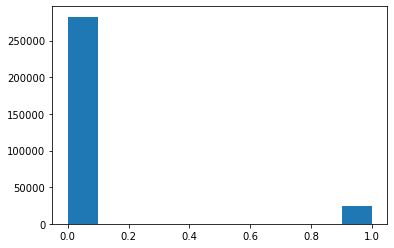

In [56]:
plt.hist(train['TARGET'].values)

In [52]:
from sklearn.preprocessing import OneHotEncoder

class OutliersShrinker:
    def __init__(self):
        self.stats = None

    def fit(self, X, y=None):
        _, self.stats = shrink_outliers(X)
        return self

    def transform(self, X, y=None):
        X_prepared, _ = shrink_outliers(X, self.stats)
        return X_prepared
        

class NanFiller:
    def __init__(self):
        self.defaults = None

    def fit(self, X, y=None):
        _, self.defaults = fill_nan(X)
        return self

    def transform(self, X, y=None):
        X_filled, _ = fill_nan(X, self.defaults)
        return X_filled
    
    
class OneHotCategTransformer:
    def __init__(self, categ_columns=[c for c in col_types.keys() if col_types[c] and c not in TARGETS]):
        self.ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
        self.categ_columns = categ_columns
    def fit(self, X, y=None):
        self.ohe.fit(X[self.categ_columns])
        return self

    def transform(self, X, y=None):
        X_categ = X[self.categ_columns]
        X_not_categ = X[X.columns.difference(self.categ_columns)].values
        X_categ_ohe_prepared = self.ohe.transform(X_categ)
        X_full_prepared = np.concatenate([X_categ_ohe_prepared, X_not_categ], axis=1)
        return X_full_prepared

In [67]:
from sklearn.metrics import roc_auc_score

def roc_auc(model, X, y, use_proba=True):
    if use_proba:
        y_pred = model.predict_proba(X)[:, 1]
    else:
        y_pred = model.predict(X)
    return roc_auc_score(y, y_pred)

In [54]:
from sklearn.pipeline import Pipeline

In [55]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(
    steps=[
        ('outliers_shrinker', OutliersShrinker()),
        ('nan_filler', NanFiller()),
        ('category_encoder', OneHotCategTransformer()),
        ('model', LogisticRegression(n_jobs=-1, solver='saga'))
    ]
)

In [68]:
def CV(model, use_proba=True):
    cv = KFold(n_splits=4,shuffle=True, random_state=0)
    res = cross_val_score(model, X, y, cv=cv, scoring=lambda m,x,y: roc_auc(m,x,y,use_proba), verbose=1, n_jobs=1)
    print(np.mean(res), np.std(res))

In [57]:
CV(model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6191670486525607 0.003308797123527842


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 17.9min finished


In [71]:
def fit_predict_and_save(model,X=X, y=y,test=test, file='vanilla_linear_model.csv', need_fit=True, use_proba=True):
    if need_fit:
        model.fit(X, y)
    if use_proba:
        test_predict = model.predict_proba(test)[:, 1]
    else:
        test_predict = 1 - 1 / (1 + np.exp(np.array(model.predict(test))))
    predictions_frame = pd.DataFrame(index=test.index, data=test_predict, columns=['TARGET'])
    predictions_frame.to_csv(file, index_label='SK_ID_CURR')
    return test_predict

In [59]:
predict = fit_predict_and_save(model,X=X, y=y,test=test, file='LogisticRegression.csv', need_fit=True)

/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [61]:
from sklearn.linear_model import LogisticRegression

model2 = Pipeline(
    steps=[
        ('outliers_shrinker', OutliersShrinker()),
        ('nan_filler', NanFiller()),
        ('category_encoder', OneHotCategTransformer()),
        ('model', LogisticRegression(n_jobs=-1))
    ]
)

In [62]:
CV(model2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6203117735461638 0.004622942683563701


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 22.1min finished


In [64]:
fit_predict_and_save(model2,X=X, y=y,test=test, file='LogisticRegressionVanilla.csv', need_fit=True)

array([0.08199087, 0.08957197, 0.04845947, ..., 0.08939665, 0.07736793,
       0.10688243])

In [65]:
from sklearn.linear_model import LinearRegression

model3 = Pipeline(
    steps=[
        ('outliers_shrinker', OutliersShrinker()),
        ('nan_filler', NanFiller()),
        ('category_encoder', OneHotCategTransformer()),
        ('model', LinearRegression(normalize=True,n_jobs=-1)),
    ]
)

In [69]:
CV(model3, use_proba=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7446100258896178 0.0031712568529845137


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.5min finished


In [73]:
fit_predict_and_save(model3,X=X, y=y,test=test, file='LinearRegressionAndSigmoid.csv', need_fit=True, use_proba=False)

array([0.52049632, 0.55447046, 0.51854617, ..., 0.52049632, 0.51952132,
       0.53898322])

In [76]:
from sklearn.linear_model import LogisticRegression

model4 = Pipeline(
    steps=[
        ('outliers_shrinker', OutliersShrinker()),
        ('nan_filler', NanFiller()),
        ('category_encoder', OneHotCategTransformer()),
        ('model', LogisticRegression(n_jobs=-1, class_weight='balanced'))
    ]
)

In [77]:
CV(model4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6052722395849359 0.005099884204046294


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 20.2min finished


In [79]:
fit_predict_and_save(model4,X=X, y=y,test=test, file='LinearRegressionClassBalanced.csv', need_fit=True, use_proba=False)

array([0.73105858, 0.73105858, 0.73105858, ..., 0.73105858, 0.5       ,
       0.73105858])